In [179]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [180]:
data=pd.read_csv('data (1).csv')

In [181]:
data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [182]:
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [183]:
#default it return last 5 rows data 
data.tail()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


In [184]:
#returns last 10 records
data.tail(10)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
934,1600,7,4,2,5,6,56,7,24,1
935,0,7,6,3,6,6,55,7,24,1
936,0,7,6,2,6,6,41,4,24,1
937,7300,1,2,3,6,0,43,7,24,0
938,16,7,7,1,7,6,34,3,24,1
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


In [185]:
#it Let's us know overall rows and columns
data.shape

(944, 10)

In [186]:
# Get basic statistics of columns
print(data.describe())

          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.000000   34.0

In [187]:
#checking the null values 
data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [188]:
# Get an overview of the dataset (missing values,types)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None


In [189]:
#check data type of each column
data.dtypes

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

In [190]:
data.corr()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
tempMode,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
AQ,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
USS,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
CS,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
VOC,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
RP,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
IP,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
Temperature,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


In [191]:
#returns number of non missing values for each column in dataset
data.count()

footfall       944
tempMode       944
AQ             944
USS            944
CS             944
VOC            944
RP             944
IP             944
Temperature    944
fail           944
dtype: int64

In [192]:
#dependent and independent variable
feature_cols=['footfall','tempMode','AQ','USS','CS','VOC','RP','IP','Temperature']
x=data[feature_cols]
y=data.fail

In [193]:
#splitting the data into testing set and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(755, 9)

(755,)

(189, 9)

(189,)

In [194]:
#fitting the model 
model=LogisticRegression(solver='lbfgs', max_iter=1000)

In [195]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('y_pred:',y_pred)

y_pred: [1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 1]


In [196]:
confusion_mat=metrics.confusion_matrix(y_test,y_pred)
print("confusion matrix :", confusion_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy score :",Accuracy_score)
print("Accuracy in percentage:", int(Accuracy_score*100),'%')

confusion matrix : [[87 15]
 [10 77]]
Accuracy score : 0.8677248677248677
Accuracy in percentage: 86 %


<Axes: >

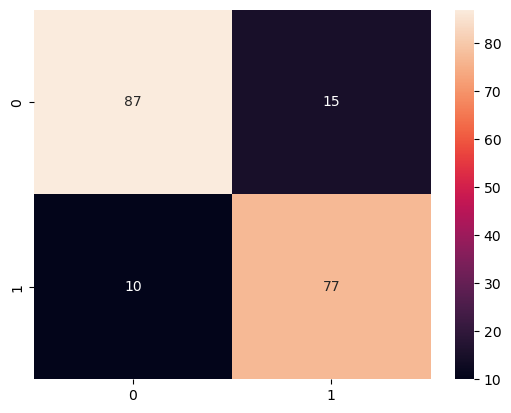

In [197]:
conf_mat=pd.crosstab(y_test,y_pred, rownames=['Actual'],colnames=['preddicted'])
sn.heatmap(confusion_mat, annot=True)

In [198]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
#classification report:precision,recall,F1-score,Accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
# ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189

Accuracy: 0.87
Precision: 0.84
Recall: 0.89
F1 Score: 0.86
ROC-AUC Score: 0.94


In [202]:
#compare first 50 predictions with actual values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head(50))

    Actual  Predicted
0        1          1
1        0          0
2        1          1
3        1          1
4        0          0
5        0          0
6        0          0
7        0          0
8        1          1
9        0          0
10       1          1
11       0          0
12       1          1
13       0          0
14       1          1
15       0          0
16       1          1
17       0          0
18       0          0
19       0          0
20       1          1
21       1          1
22       1          0
23       0          0
24       0          0
25       1          1
26       1          1
27       1          1
28       0          1
29       1          1
30       0          0
31       1          1
32       1          1
33       0          0
34       1          1
35       1          1
36       0          0
37       0          0
38       0          0
39       0          0
40       0          1
41       1          1
42       0          0
43       0          0
44       1

In [ ]:

# Collect user input for prediction
import numpy as np

# Define the sensor features
features = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'machineTemp']

# Collect input values
print("Please enter the following sensor values for prediction:")
input_values = []
for feature in features:
    value = float(input(f"Enter value for {feature}: "))
    input_values.append(value)

# Convert the input to a numpy array and reshape for model
input_array = np.array(input_values).reshape(1, -1)

# Perform prediction
prediction = model.predict(input_array)
probability = model.predict_proba(input_array)[0][1]

# Output the result
if prediction[0] == 1:
    print(f"Prediction: Machine will FAIL (Probability: {probability:.2f})")
else:
    print(f"Prediction: Machine will NOT fail (Probability: {probability:.2f})")
